In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
import warnings
warnings.filterwarnings('ignore')

Load data from a csv export from task 2

In [4]:
df_clean = pd.read_csv('../schema/df_clean.csv')

print(df_clean.head())


      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Netflix DL (Bytes)  Netflix UL (Bytes)  \
0  9.16456699548519E+015  ...           8198936.0           9656251.0   
1                L77566A  ...          18338413.0          17227132.0   

In [5]:
df_clean.isna().sum()

Bearer Id                           991
Start                                 1
Start ms                              1
End                                   1
End ms                                1
Dur. (ms)                             1
IMSI                                570
MSISDN/Number                      1066
IMEI                                572
Last Location Name                 1153
Avg RTT DL (ms)                   27829
Avg RTT UL (ms)                   27812
Avg Bearer TP DL (kbps)               1
Avg Bearer TP UL (kbps)               1
DL TP < 50 Kbps (%)                 754
50 Kbps < DL TP < 250 Kbps (%)      754
250 Kbps < DL TP < 1 Mbps (%)       754
DL TP > 1 Mbps (%)                  754
UL TP < 10 Kbps (%)                 792
10 Kbps < UL TP < 50 Kbps (%)       792
50 Kbps < UL TP < 300 Kbps (%)      792
UL TP > 300 Kbps (%)                792
Activity Duration DL (ms)             1
Activity Duration UL (ms)             1
Dur. (ms).1                           1


In [8]:
df_ffill = df_clean.fillna(method='ffill')
df_bfill = df_clean.fillna(method='bfill')

In [11]:
df_ffill.isna().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250

Aggregate metrics per customer id (MSISDN) and report the top 10 customers per engagement metric 

In [12]:


grouped_df = df_ffill.groupby('MSISDN/Number')

engagement_metrics = {
    'Sessions Frequency': grouped_df.size(),
    'Session Duration': grouped_df['Dur. (ms).1'].sum(),
    'Sessions Total Traffic': grouped_df[['Total DL (Bytes)', 'Total UL (Bytes)']].sum().sum(axis=1)
}

engagement_df = pd.DataFrame(engagement_metrics)

top_10_frequency = engagement_df['Sessions Frequency'].nlargest(10)
top_10_duration = engagement_df['Session Duration'].nlargest(10)
top_10_traffic = engagement_df['Sessions Total Traffic'].nlargest(10)

print("Top 10 Customers by Sessions Frequency:")
print(top_10_frequency)
print("\nTop 10 Customers by Session Duration:")
print(top_10_duration)
print("\nTop 10 Customers by Sessions Total Traffic:")
print(top_10_traffic)


Top 10 Customers by Sessions Frequency:
MSISDN/Number
3.362632e+10    18
3.361489e+10    17
3.362578e+10    17
3.365973e+10    16
3.367588e+10    15
3.376054e+10    15
3.366716e+10    13
3.360313e+10    12
3.360452e+10    12
3.362708e+10    12
Name: Sessions Frequency, dtype: int64

Top 10 Customers by Session Duration:
MSISDN/Number
3.365973e+10    1.905491e+09
3.362632e+10    1.785435e+09
3.365936e+10    1.748002e+09
3.367588e+10    1.745144e+09
3.361489e+10    1.678412e+09
3.376054e+10    1.651096e+09
3.362578e+10    1.599068e+09
3.378632e+10    1.427817e+09
3.366471e+10    1.334991e+09
3.360658e+10    1.322254e+09
Name: Session Duration, dtype: float64

Top 10 Customers by Sessions Total Traffic:
MSISDN/Number
3.361489e+10    8.846226e+09
3.376054e+10    8.514774e+09
3.362578e+10    8.499621e+09
3.362632e+10    7.971167e+09
3.367588e+10    7.891111e+09
3.365973e+10    7.705863e+09
3.366646e+10    7.308501e+09
3.376041e+10    7.132371e+09
3.366471e+10    6.872018e+09
3.369879e+10   

Normalize each engagement metric and run a k-means (k=3)

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
engagement_normalized = scaler.fit_transform(engagement_df)

kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(engagement_normalized)

engagement_df['Cluster'] = cluster_labels

print(engagement_df)


               Sessions Frequency  Session Duration  Sessions Total Traffic  \
MSISDN/Number                                                                 
3.360100e+10                    1       116720140.0            8.786906e+08   
3.360100e+10                    1       181230963.0            1.568596e+08   
3.360100e+10                    1       134969374.0            5.959665e+08   
3.360101e+10                    1        49878024.0            4.223207e+08   
3.360101e+10                    2        37104453.0            1.457411e+09   
...                           ...               ...                     ...   
3.379000e+10                    1         8810688.0            7.146416e+08   
3.379000e+10                    1       140988659.0            4.803073e+08   
3.197021e+12                    1        86399983.0            2.321240e+08   
3.370000e+14                    1        86399983.0            5.962878e+08   
8.823971e+14                    1        86399983.0 

Compute the minimum, maximum, average & total non-normalized metrics for each cluster

In [14]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

cluster_metrics = pd.DataFrame(cluster_centers, columns=engagement_df.columns[:-1])

cluster_metrics['Minimum'] = cluster_metrics.min(axis=1)
cluster_metrics['Maximum'] = cluster_metrics.max(axis=1)
cluster_metrics['Average'] = cluster_metrics.mean(axis=1)
cluster_metrics['Total'] = cluster_metrics.sum(axis=1)

print(cluster_metrics)


   Sessions Frequency  Session Duration  Sessions Total Traffic   Minimum  \
0            1.031529      9.323202e+07            4.982586e+08  1.031529   
1            4.202022      4.366700e+08            2.173135e+09  4.202022   
2            2.152710      1.918198e+08            1.095383e+09  2.152710   

        Maximum       Average         Total  
0  4.982586e+08  2.179498e+08  1.307699e+09  
1  2.173135e+09  9.565878e+08  5.739527e+09  
2  1.095383e+09  4.765173e+08  2.859104e+09  


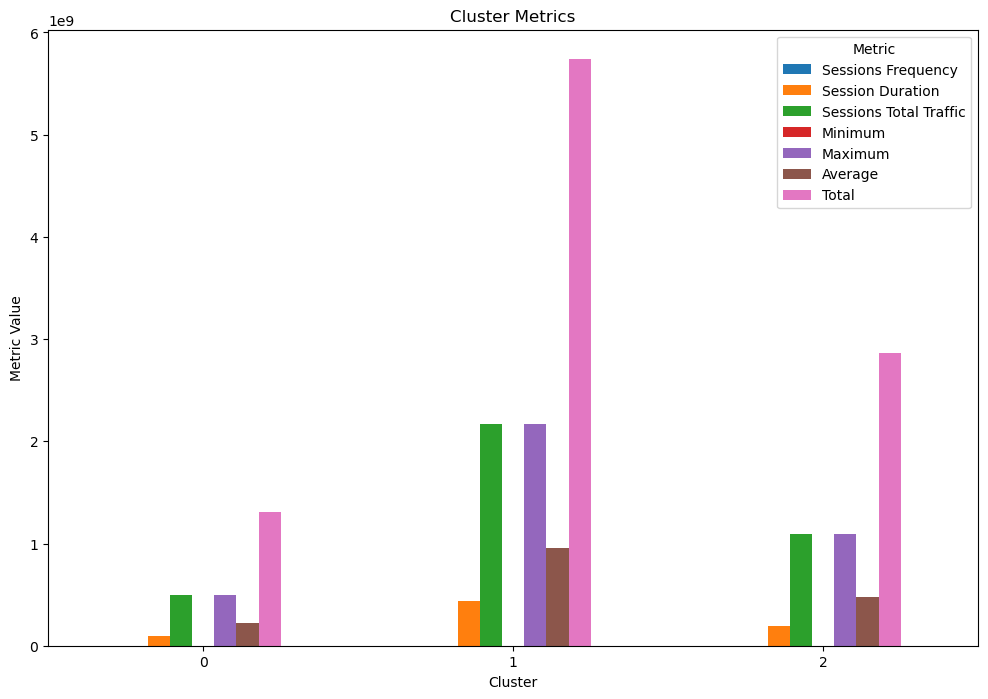

In [19]:
cluster_metrics.plot(kind='bar', figsize=(12, 8))
plt.title('Cluster Metrics')
plt.xlabel('Cluster')
plt.ylabel('Metric Value')
plt.xticks(rotation=0)
plt.legend(title='Metric')
plt.show()


Aggregate user total traffic per application and derive the top 10 most engaged users per application


In [21]:

user_app_traffic = df_ffill.groupby(['MSISDN/Number']).agg({
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum'
})

user_app_traffic['Social Media'] = user_app_traffic['Social Media DL (Bytes)'] + user_app_traffic['Social Media UL (Bytes)']
user_app_traffic['Google'] = user_app_traffic['Google DL (Bytes)'] + user_app_traffic['Google UL (Bytes)']
user_app_traffic['Email'] = user_app_traffic['Email DL (Bytes)'] + user_app_traffic['Email UL (Bytes)']
user_app_traffic['Netflix'] = user_app_traffic['Netflix DL (Bytes)'] + user_app_traffic['Netflix UL (Bytes)']
user_app_traffic['Gaming'] = user_app_traffic['Gaming DL (Bytes)'] + user_app_traffic['Gaming UL (Bytes)']

top_users_per_app = {}
for column in user_app_traffic.columns[-6:]:
    top_users_per_app[column] = user_app_traffic.nlargest(10, column)

for app, top_users in top_users_per_app.items():
    print(f"Top 10 most engaged users for {app}:")
    print(top_users)
    print("\n")


Top 10 most engaged users for Gaming UL (Bytes):
               Social Media DL (Bytes)  Social Media UL (Bytes)  \
MSISDN/Number                                                     
3.362578e+10                26564121.0                 571379.0   
3.376054e+10                39297646.0                 485543.0   
3.362632e+10                42743837.0                 630942.0   
3.361489e+10                27749744.0                 544800.0   
3.365973e+10                34900444.0                 511914.0   
3.369879e+10                15390784.0                 337377.0   
3.378632e+10                23568655.0                 406264.0   
3.376127e+10                14201427.0                 294653.0   
3.367588e+10                18655364.0                 567557.0   
3.366907e+10                23477047.0                 323787.0   

               Google DL (Bytes)  Google UL (Bytes)  Email DL (Bytes)  \
MSISDN/Number                                                           
